In [1]:
# Imports
import tensorflow as tf
import numpy as np
from random import randint
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras import losses
import tensorflow.keras.backend as backend

import matplotlib.pyplot as plt

In [2]:
# Define a ceiling function
def binarizePredictions(predictions):
  binarized = []
  for predictionRow in predictions:
    binarizedRow = np.zeros(len(predictionRow))
    max = -1
    maxIndex = 0
    index = 0
    for element in predictionRow:
      if element > max:
        maxIndex = index
        max = element
      index = index + 1
    binarizedRow[maxIndex] = 1
    binarized.append(binarizedRow)
  return binarized

# Define a bit counting function
def countBitErrors(output, predictions):
  bit_errors = 0
  for i in range(len(output)):
    output_row = output[i]
    prediction_row = predictions[i]
    for j in range(len(output_row)):
      if output_row[j] != prediction_row[j]:
        bit_errors = bit_errors + 1
  return bit_errors

In [3]:
# Define the data
stimulusResponsePairCount = 10000
classes = 256

In [4]:
# Generate random data and one-hot encode it

x = []
for i in range(stimulusResponsePairCount):
  z = []
  z.append(i)
  x.append(z)
x = np.asarray(x)

y_classes = np.random.randint(classes, size=(stimulusResponsePairCount,1))
y = tf.keras.utils.to_categorical(y_classes, num_classes=classes)
print(x)
print(y_classes)
print(y)

[[   0]
 [   1]
 [   2]
 ...
 [9997]
 [9998]
 [9999]]
[[194]
 [150]
 [159]
 ...
 [ 47]
 [175]
 [161]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
# Define the model

model = Sequential()
model.add(Dense(1, input_dim=1))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'binary_accuracy', 'categorical_accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               8448      
Total params: 9,570
Trainable params: 9,570
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Fit the model

history = model.fit(x, y, epochs=10000, batch_size=10000)

Epoch 1/10000


InternalError:  Blas GEMV launch failed:  m=1, n=10000
	 [[node sequential/dense/MatMul (defined at <ipython-input-6-4319eaaed78b>:3) ]] [Op:__inference_train_function_816]

Function call stack:
train_function


(10000, 256)
19320 Bit Errors


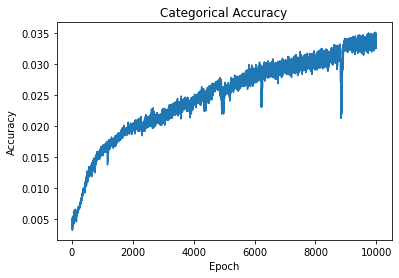

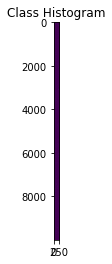

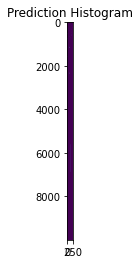

In [104]:
# Output the result
predictions = model.predict(x)
print(predictions.shape)
predictions = binarizePredictions(predictions)

# Summary
bitErrors = countBitErrors(y, predictions)
print(str(bitErrors) + ' Bit Errors')
print('Weights: ')
print(model.get_weights())

plt.plot(history.history['categorical_accuracy'])
plt.title('Categorical Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

plt.imshow(y)
plt.title('Class Histogram')
plt.show()

plt.imshow(predictions)
plt.title('Prediction Histogram')
plt.show()